In [0]:
import os
base_dir = 'cats_and_dogs_from_zip'

In [2]:
from keras.layers import *
from keras.models import *
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
def build_model():
    net = Sequential()
    net.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(150, 150, 3)))
    net.add(MaxPooling2D((2, 2)))
    
    net.add(Conv2D(64, (3, 3), activation = 'relu'))
    net.add(MaxPooling2D((2, 2)))
    
    net.add(Conv2D(128, (3, 3), activation = 'relu'))
    net.add(MaxPooling2D((2, 2)))
    
    net.add(Conv2D(128, (3, 3), activation = 'relu'))
    net.add(MaxPooling2D((2, 2)))
    
    net.add(Flatten())
    net.add(Dropout(0.5))
    
    net.add(Dense(512, activation = 'relu'))
    net.add(Dense(1, activation = 'sigmoid'))
    
    net.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])
    return net

In [0]:
def get_image_generator():
    train_gen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True
    )
    test_gen = ImageDataGenerator(rescale=1./255)
    
    train_generator = train_gen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary'
    )
    
    validation_generator = test_gen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 32,
        class_mode = 'binary'
    )
    
    return { 't':train_generator, 'v':validation_generator }

In [0]:
def train_model(model, t_gen, v_gen):
    history = model.fit_generator(
        t_gen,
        steps_per_epoch=100,
        epochs=100,
        validation_data=v_gen,
        validation_steps=50
    )
    
    model.save('cats_and_dogs_1.h5')
    
    return history

In [0]:
import matplotlib.pyplot as plt
def plot(history):
    acc = history['acc']
    val_acc = history['val_acc']
    loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.clf()
    plt.plot(epochs, acc, 'bo', label='Train Loss')
    plt.plot(epochs, loss, 'bP', label='Train Acc')
    plt.plot(epochs, val_acc, 'ro', label='Validation_Acc')
    plt.plot(epochs, val_loss, 'rP', label='Validation_Loss')
    
    plt.legend()
    plt.show()

In [8]:
model = build_model()
model.summary()
ig = get_image_generator()
history = train_model(model, ig['t'], ig['v'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

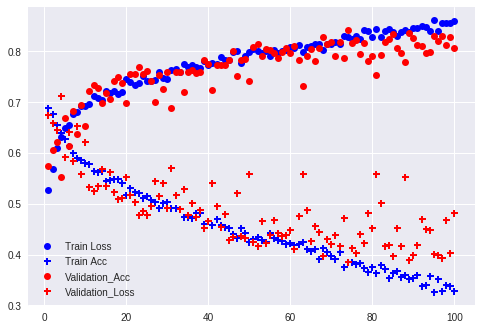

In [9]:
plot(history.history)